### Fonctionnalité 2 : Apprentissage non-supervisé

#### Importation des données

Valeur cible 1 :  id_code_insee  -  8258
Valeur cible 2 :  Num_Acc  -  40250
Valeur cible 3 :  num_veh  -  58
Valeur cible 4 :  id_usa  -  73643
Valeur cible 5 :  date  -  29950
Valeur cible 6 :  ville  -  8078
Valeur cible 7 :  latitude.x  -  1253
Valeur cible 8 :  longitude.x  -  1495
Valeur cible 9 :  descr_cat_veh  -  24
Valeur cible 10 :  descr_agglo  -  2
Valeur cible 11 :  descr_athmo  -  9
Valeur cible 12 :  descr_lum  -  5
Valeur cible 13 :  descr_etat_surf  -  9
Valeur cible 14 :  description_intersection  -  9
Valeur cible 15 :  an_nais  -  101
Valeur cible 16 :  age  -  101
Valeur cible 17 :  place  -  10
Valeur cible 18 :  descr_dispo_secu  -  15
Valeur cible 19 :  descr_grav  -  4
Valeur cible 20 :  descr_motif_traj  -  6
Valeur cible 21 :  descr_type_col  -  7
Valeur cible 22 :  department_name  -  89
Valeur cible 23 :  department_number  -  89
Valeur cible 24 :  region_name  -  17
Nombre d'instances :  73643


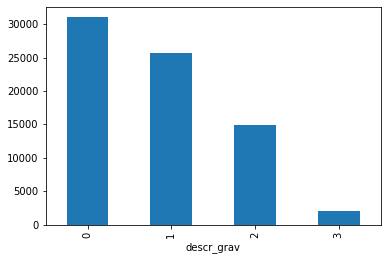

Taille des features :  23
  id_code_insee       Num_Acc num_veh  id_usa            date  \
0         10100  200900035904     A01  823507  20090803130000   
1         10100  200900004313     A01  752937  20090227223000   
2         10102  200900005197     A01  754945  20090113160000   
3         10102  200900005197     B02  754947  20090113160000   
4         10102  200900005206     A01  754970  20090209201500   

              ville  latitude.x  longitude.x  descr_cat_veh  descr_agglo  ...  \
0            CLEREY     48.2000          4.2              2            1  ...   
1            CLEREY     48.2000          4.2              3            2  ...   
2  COLOMBE LA FOSSE     48.2667          4.8              3            2  ...   
3  COLOMBE LA FOSSE     48.2667          4.8              3            2  ...   
4  COLOMBE LA FOSSE     48.2667          4.8              6            2  ...   

   an_nais   age  place                         descr_dispo_secu  descr_grav  \
0   1952.0  57.0

In [23]:
# Éxécution du fichier preparation.ipynb
# afin de récupérer le dataframe pour l'analyse non supervisée

%run preparation.ipynb
df = dataframe

###### <p style="font-size: 16px">Test de l'importation des données<p>

In [24]:
df

,id_code_insee,Num_Acc,id_usa,date,latitude.x,longitude.x,descr_cat_veh,descr_agglo,descr_athmo,descr_lum,...,description_intersection,an_nais,age,place,descr_dispo_secu,descr_grav,descr_motif_traj,descr_type_col,department_number,region_number
0,10100,200900035904,823507,20090803130000,48.2000,4.2000,2,1,4,2,...,1,1952.0,57.0,1.0,0,0,1,0,10,44
1,10100,200900004313,752937,20090227223000,48.2000,4.2000,3,2,4,3,...,1,1952.0,57.0,1.0,0,2,9,1,10,44
2,10102,200900005197,754945,20090113160000,48.2667,4.8000,3,2,5,2,...,2,1969.0,40.0,1.0,0,2,5,2,10,44
3,10102,200900005197,754947,20090113160000,48.2667,4.8000,3,2,5,2,...,2,1939.0,70.0,1.0,0,0,5,2,10,44
4,10102,200900005206,754970,20090209201500,48.2667,4.8000,6,2,6,1,...,4,1966.0,43.0,1.0,1,1,1,3,10,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73638,97423,200900073933,908050,20090810131500,55.2952,-21.1059,15,1,4,2,...,1,1979.0,30.0,1.0,1,2,5,1,974,4
73639,97423,200900072904,905890,20090506063000,55.2952,-21.1059,2,1,4,1,...,1,1953.0,56.0,1.0,0,0,1,1,974,4
73640,97424,200900073058,906209,20090621190000,55.4697,-21.1367,17,1,4,3,...,1,1962.0,47.0,1.0,9,3,5,1,974,4
73641,97424,200900072573,905199,20090116221500,55.4697,-21.1367,15,2,4,3,...,1,1982.0,27.0,1.0,6,2,5,3,974,4


#### Réduction de dimension :

###### <p style="font-size: 16px">Corrélation entre attributs et suppression manuelle de quelques features<p>

In [31]:
df_manual = df

<Axes: >

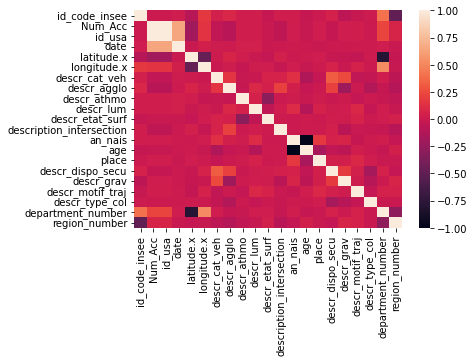

In [32]:
import seaborn as sns

# On réalise une heatmap de corrélation pour voir les corrélations entre les variables,
# cela permettra de voir si certaines variables sont redondantes avec les strings
corr = df_manual.corr()

# On réalise une heatmap pour visualiser les corrélations à l'aide de seaborn

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [33]:
# On extrait toutes les corréaltions supérieures à 0.6 en valeur absolue, on supprime les répétitions

corr = corr.abs()
corr = corr.unstack()
corr = corr.sort_values(kind="quicksort", ascending=False)
corr = corr[corr > 0.6]
corr = corr[corr < 1]
corr = corr.drop_duplicates()
corr = pd.DataFrame(corr)
corr = corr.reset_index()
corr.columns = ["Variable 1", "Variable 2", "Corrélation"]
corr

,Variable 1,Variable 2,Corrélation
0,age,an_nais,1.000000
1,id_usa,Num_Acc,0.999996
2,department_number,latitude.x,0.796876
3,Num_Acc,date,0.646415
4,date,id_usa,0.646309


In [34]:
# On supprime les colonnes 'an_nais', 'id_usa', 'num_acc' et 'department_number' car elles sont corolés à d'autres variables

df_manual = df_manual.drop(columns=['an_nais', 'id_usa', 'Num_Acc', 'department_number'])

In [35]:
df_manual

,id_code_insee,date,latitude.x,longitude.x,descr_cat_veh,descr_agglo,descr_athmo,descr_lum,descr_etat_surf,description_intersection,age,place,descr_dispo_secu,descr_grav,descr_motif_traj,descr_type_col,region_number
0,10100,20090803130000,48.2000,4.2000,2,1,4,2,4,1,57.0,1.0,0,0,1,0,44
1,10100,20090227223000,48.2000,4.2000,3,2,4,3,4,1,57.0,1.0,0,2,9,1,44
2,10102,20090113160000,48.2667,4.8000,3,2,5,2,4,2,40.0,1.0,0,2,5,2,44
3,10102,20090113160000,48.2667,4.8000,3,2,5,2,4,2,70.0,1.0,0,0,5,2,44
4,10102,20090209201500,48.2667,4.8000,6,2,6,1,3,4,43.0,1.0,1,1,1,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73638,97423,20090810131500,55.2952,-21.1059,15,1,4,2,4,1,30.0,1.0,1,2,5,1,4
73639,97423,20090506063000,55.2952,-21.1059,2,1,4,1,4,1,56.0,1.0,0,0,1,1,4
73640,97424,20090621190000,55.4697,-21.1367,17,1,4,3,4,1,47.0,1.0,9,3,5,1,4
73641,97424,20090116221500,55.4697,-21.1367,15,2,4,3,4,1,27.0,1.0,6,2,5,3,4


###### <p style="font-size: 16px">Utilisation de PCA<p>

In [39]:
df_pca = df

In [40]:
# On utilise la méthode PCA pour réduire le nombre de variables

from sklearn.decomposition import PCA

# On crée un objet PCA avec 2 composantes
pca = PCA(n_components=7)

# On applique l'objet PCA sur notre dataframe
pca.fit(df_pca)

# On transforme notre dataframe avec les 2 composantes
df_pca = pca.transform(df_pca)

In [41]:
df_pca

array([[-1.25871490e+08, -7.95081298e+03,  4.74387054e+04, ...,
         5.19903966e+00,  1.67412083e+00,  3.85534112e+01],
       [ 4.50035515e+08, -2.66490802e+04,  4.71417204e+04, ...,
         1.82857438e+01,  3.10420097e+00,  3.61949124e+01],
       [ 5.64098514e+08, -1.28492510e+04,  4.66966120e+04, ...,
         2.66241964e+01, -1.53576923e+01,  2.08687343e+01],
       ...,
       [ 5.60684998e+07,  9.92887829e+04, -4.24861476e+04, ...,
         5.22833091e+01,  1.07520182e+01,  1.34623163e+01],
       [ 5.61036997e+08,  1.49552063e+05, -4.42100522e+04, ...,
         6.51891050e+01, -1.25772105e+01, -2.26442022e+00],
       [ 5.60684998e+07,  9.92906081e+04, -4.24861875e+04, ...,
         5.30347475e+01,  1.43895326e+01,  1.63756586e+01]])

###### <p style="font-size: 16px">Visualisation avant/après & Pourcentage de réduction<p>

In [48]:
df

,id_code_insee,Num_Acc,id_usa,date,latitude.x,longitude.x,descr_cat_veh,descr_agglo,descr_athmo,descr_lum,...,description_intersection,an_nais,age,place,descr_dispo_secu,descr_grav,descr_motif_traj,descr_type_col,department_number,region_number
0,10100,200900035904,823507,20090803130000,48.2000,4.2000,2,1,4,2,...,1,1952.0,57.0,1.0,0,0,1,0,10,44
1,10100,200900004313,752937,20090227223000,48.2000,4.2000,3,2,4,3,...,1,1952.0,57.0,1.0,0,2,9,1,10,44
2,10102,200900005197,754945,20090113160000,48.2667,4.8000,3,2,5,2,...,2,1969.0,40.0,1.0,0,2,5,2,10,44
3,10102,200900005197,754947,20090113160000,48.2667,4.8000,3,2,5,2,...,2,1939.0,70.0,1.0,0,0,5,2,10,44
4,10102,200900005206,754970,20090209201500,48.2667,4.8000,6,2,6,1,...,4,1966.0,43.0,1.0,1,1,1,3,10,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73638,97423,200900073933,908050,20090810131500,55.2952,-21.1059,15,1,4,2,...,1,1979.0,30.0,1.0,1,2,5,1,974,4
73639,97423,200900072904,905890,20090506063000,55.2952,-21.1059,2,1,4,1,...,1,1953.0,56.0,1.0,0,0,1,1,974,4
73640,97424,200900073058,906209,20090621190000,55.4697,-21.1367,17,1,4,3,...,1,1962.0,47.0,1.0,9,3,5,1,974,4
73641,97424,200900072573,905199,20090116221500,55.4697,-21.1367,15,2,4,3,...,1,1982.0,27.0,1.0,6,2,5,3,974,4


In [49]:
df_manual

,id_code_insee,date,latitude.x,longitude.x,descr_cat_veh,descr_agglo,descr_athmo,descr_lum,descr_etat_surf,description_intersection,age,place,descr_dispo_secu,descr_grav,descr_motif_traj,descr_type_col,region_number
0,10100,20090803130000,48.2000,4.2000,2,1,4,2,4,1,57.0,1.0,0,0,1,0,44
1,10100,20090227223000,48.2000,4.2000,3,2,4,3,4,1,57.0,1.0,0,2,9,1,44
2,10102,20090113160000,48.2667,4.8000,3,2,5,2,4,2,40.0,1.0,0,2,5,2,44
3,10102,20090113160000,48.2667,4.8000,3,2,5,2,4,2,70.0,1.0,0,0,5,2,44
4,10102,20090209201500,48.2667,4.8000,6,2,6,1,3,4,43.0,1.0,1,1,1,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73638,97423,20090810131500,55.2952,-21.1059,15,1,4,2,4,1,30.0,1.0,1,2,5,1,4
73639,97423,20090506063000,55.2952,-21.1059,2,1,4,1,4,1,56.0,1.0,0,0,1,1,4
73640,97424,20090621190000,55.4697,-21.1367,17,1,4,3,4,1,47.0,1.0,9,3,5,1,4
73641,97424,20090116221500,55.4697,-21.1367,15,2,4,3,4,1,27.0,1.0,6,2,5,3,4


In [50]:
df_pca

array([[-1.25871490e+08, -7.95081298e+03,  4.74387054e+04, ...,
         5.19903966e+00,  1.67412083e+00,  3.85534112e+01],
       [ 4.50035515e+08, -2.66490802e+04,  4.71417204e+04, ...,
         1.82857438e+01,  3.10420097e+00,  3.61949124e+01],
       [ 5.64098514e+08, -1.28492510e+04,  4.66966120e+04, ...,
         2.66241964e+01, -1.53576923e+01,  2.08687343e+01],
       ...,
       [ 5.60684998e+07,  9.92887829e+04, -4.24861476e+04, ...,
         5.22833091e+01,  1.07520182e+01,  1.34623163e+01],
       [ 5.61036997e+08,  1.49552063e+05, -4.42100522e+04, ...,
         6.51891050e+01, -1.25772105e+01, -2.26442022e+00],
       [ 5.60684998e+07,  9.92906081e+04, -4.24861875e+04, ...,
         5.30347475e+01,  1.43895326e+01,  1.63756586e+01]])

In [43]:
# On réalise le pourcentage de réduction entre df et df_manual et df_pca
print("Pourcentage de réduction de dimension entre df et df_manual, méthode manuelle : ", round((1 - (df_manual.shape[1] / df.shape[1])) * 100, 2), "%")
print("Pourcentage de réduction de dimension entre df et df_pca, méthode PCA : ", round((1 - (df_pca.shape[1] / df.shape[1])) * 100, 2), "%")

Pourcentage de réduction de dimension entre df et df_manual, méthode manuelle :  19.05 %
Pourcentage de réduction de dimension entre df et df_pca, méthode PCA :  66.67 %


#### Partitionnement (clustering) :

##### <p style="font-size: 19px">Partie avec df_manual:<p>

###### <p style="font-size: 16px">k-means « from scratch » avec :<p>

###### <p style="font-size: 16px">k-means en utilisant les fonctions mises à disposition dans la bibliothèque scikit-learn avec :<p>

##### <p style="font-size: 19px">Partie avec df_pca:<p>

###### <p style="font-size: 16px">k-means « from scratch » avec :<p>

###### <p style="font-size: 16px">k-means en utilisant les fonctions mises à disposition dans la bibliothèque scikit-learn avec :<p>